In [7]:
# A simple notebook to plot the zonal mean of a field in WACCM
# /glade/u/home/marsh/demo/zonal_mean.ipynb
# 18 Sep 2020

# import modules to access netcdf files and plot data

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# open a WACCM monthly mean file (here a PI control for December)

data_dir = '/glade/u/home/marsh/demo/sample_data/'
waccm_file = 'b.e21.BWma1850.f19_g17.CMIP6-piControl-WACCM-MA-2deg.001.cam.h0.0300-12.nc'

ds = xr.open_dataset(data_dir+waccm_file)


In [9]:
# extract ozone zonal mean

o3 = ds['O3'].mean(dim='lon').isel(time=0)


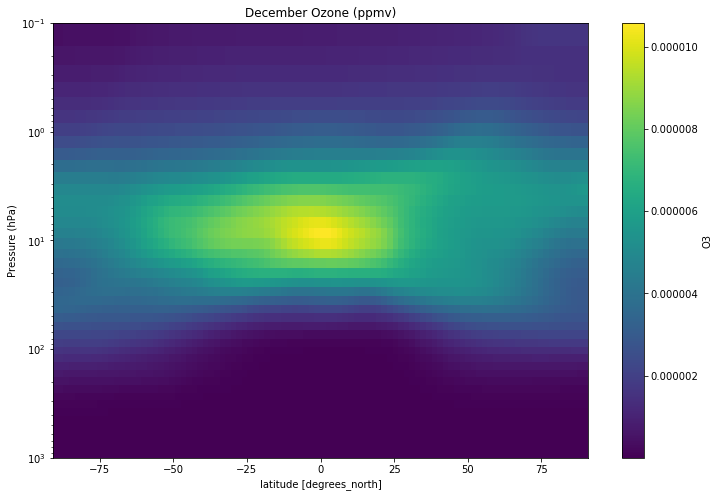

In [10]:
# create a contour plot 
plt.figure(figsize=(12,8))

o3.plot.pcolormesh()

#control the look of the output
ax = plt.gca()

ax.set_ylim([1000,0.1])
ax.set_yscale('log')
ax.set_ylabel('Pressure (hPa)')
plt.title('December Ozone (ppmv)')

# save the figure to png
plt.savefig("PI_O3_Dec.png", bbox_inches="tight")

plt.show()


In [11]:
# archive the data used to make the plot in a netcdf file

o3.to_netcdf('PI_O3_Dec.nc')

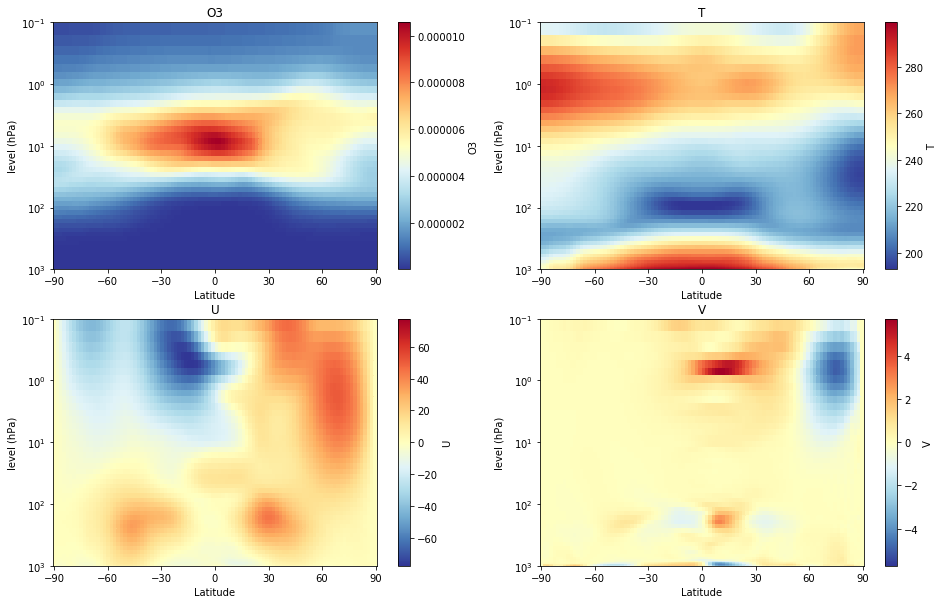

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

plt_yrange = [1000,0.1]

for i, field in enumerate(('O3', 'T', 'U', 'V')):
    plt.subplot(2, 2, i+1)
    zm = ds[field].mean(dim='lon').isel(time=0)

    zm.where(ds.coords["lev"] > plt_yrange[1]).plot.pcolormesh(cmap='RdYlBu_r')
        
    plt.xticks(np.arange(-90, 91, 30))
    ax = plt.gca()
    ax.set_ylim(plt_yrange)
    ax.set_yscale('log')

    ax.set_ylabel('level (hPa)')
    ax.set_xlabel('Latitude')
    ax.minorticks_off()
    
    plt.title(field)